# Package Imports

In [197]:
using Pkg;
Pkg.add("CSV");
Pkg.add("DataFrames");
Pkg.add("MultivariateStats");
Pkg.add("Plots");
Pkg.add("PlotThemes");
Pkg.add("ScikitLearn");

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [198]:
using CSV, DataFrames, MultivariateStats, Plots, PlotThemes, ScikitLearn;

In [199]:
@sk_import svm: LinearSVC;
@sk_import model_selection: train_test_split;
@sk_import metrics: accuracy_score;
@sk_import preprocessing : MinMaxScaler;

┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore /Users/briankoehler/.julia/packages/ScikitLearn/NJwUf/src/Skcore.jl:179


# Data Preprocessing

In [200]:
# Read data from CSV
data = CSV.read("./01_hdp.csv", DataFrame);

# Partition data into independent and dependent variables
data_x = convert(Array, select(data, [:tumorsize, :co2, :lungcapacity, :Age, :WBC, :RBC, :BMI, :IL6, :CRP, :Medicaid]));
data_y = convert(Array, select(data, :CancerStage));

In [201]:
# Normalize columns
scaler = MinMaxScaler();
normalized_data = scaler.fit_transform(data_x);

In [202]:
# Transpose independent variables
data_x_transposed = transpose(normalized_data);

# Feature Count Evaluation

In [203]:
# Initialize metric arrays
accuracies = [];
times = [];

In [204]:
for dim_count = 1 : 10
    # Train PCA Model
    t=@elapsed begin
        pca_model = fit(PCA, data_x_transposed; maxoutdim=dim_count);

        # Transform features
        pca_features = MultivariateStats.transform(pca_model, data_x_transposed);

        # Transpose features
        pca_features_transposed = transpose(pca_features);
    end
    push!(times, t)

    # Partition data
    x_train, x_test, y_train, y_test = train_test_split(pca_features_transposed, data_y, test_size=0.3);

    # Initialize SVC Model
    svc_model = LinearSVC(max_iter=500);

    # Fit Model
    fit!(svc_model, x_train, vec(y_train));

    # Make predictions
    predictions = ScikitLearn.predict(svc_model, x_test);

    # Cache accuracy
    accuracy = accuracy_score(predictions, y_test);
    push!(accuracies, accuracy);
end

# Plotting

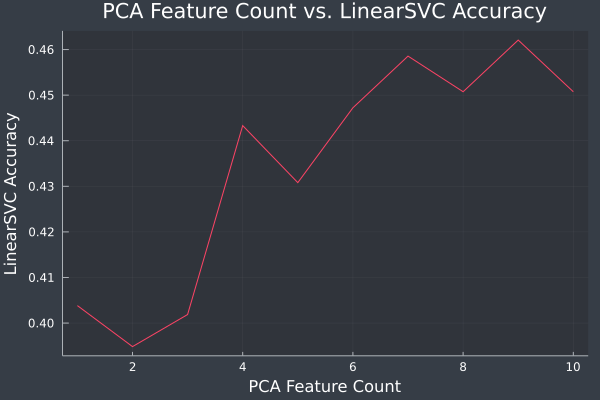

In [205]:
x = 1:10;
y = accuracies;
theme(:dark)
plot(x, y, title="PCA Feature Count vs. LinearSVC Accuracy", xlabel="PCA Feature Count", ylabel="LinearSVC Accuracy", legend=false)

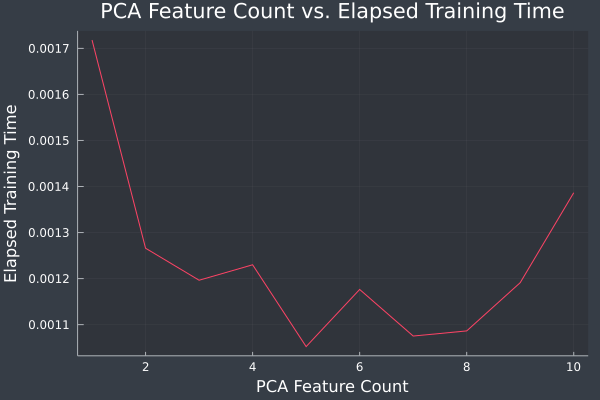

In [206]:
x = 1:10;
y = times;
theme(:dark)
plot(x, y, title="PCA Feature Count vs. Elapsed Training Time", xlabel="PCA Feature Count", ylabel="Elapsed Training Time", legend=false)